# Fitting a Reinforcement Learning Model with MCMC

We recently incorporated Markov Chain Monte-Carlo into the `fitr` workflow, using Stan (via PyStan) as our back-end engine for MCMC. This tutorial reviews how you can fit a reinforcement learning model to behavioural data using `fitr.MCMC`.

In [1]:
import numpy as np 

import fitr
from fitr.rlparams import *
from fitr import tasks
from fitr import generative_models as gm 

# Run a Two-Armed Bandit Task to Generate Data

First generate a group of subjects. We have a function called `generate_group`, that does this automatically, returning an $N_{subjects} \times N_{parameters}$ array. 

In [2]:
group = generate_group(params=[LearningRate(), ChoiceRandomness()], nsubjects=50)

Now we can simulate the task.

In [3]:
taskresults = tasks.bandit(narms=2).simulate(params=group, ntrials=50)

Note that the `taskresults` object has two data storage containers: one for MCMC (accessed with `.data_mcmc` attribute) and one for the non-MCMC methods (accessed with the `.data` attribute).

# Fit Models

The way `fitr`'s MCMC class is set up requires some slight deviations from usual use. Instead of likelihood functions, you must input a generative model (specified with Stan), which we have included in our `generative_models` module. 

Note belwo that we accessed the data using `.data_mcmc`. Moreover, the number of iterations was specified (you can leave this blank and it will default to 2000); this was done just for simplicity in generating this example.

In [4]:
lrcr = fitr.MCMC(generative_model=gm.bandit(model='lr_cr')).fit(data=taskresults.data_mcmc, n_iterations=100)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_663c7b7daa4c656a2ed7f3ba5197de6a NOW.


     MODEL: FitrMCMCModel
     METHOD: Markov Chain Monte-Carlo
     ITERATIONS: 100
     OPTIMIZATION ALGORITHM: NUTS



Now let's plot the results.

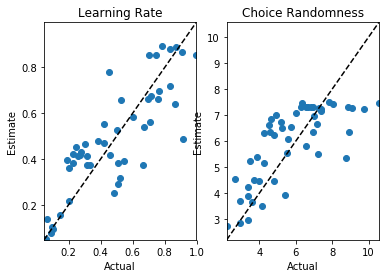

In [5]:
lrcr.plot_ae(actual=group)

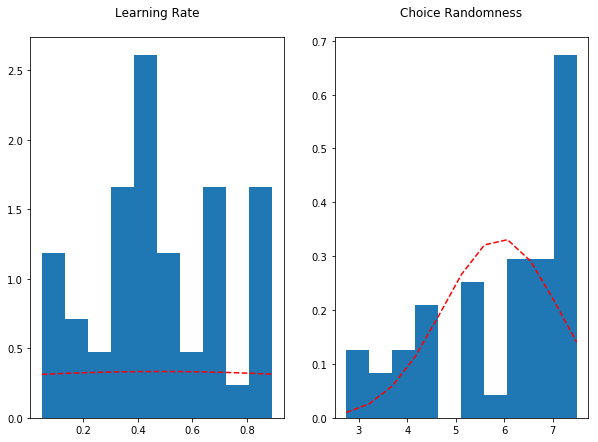

In [6]:
lrcr.param_hist()

We are working on easy commands for the typical plots associated with Stan, but for now, you can access them directly as follows:

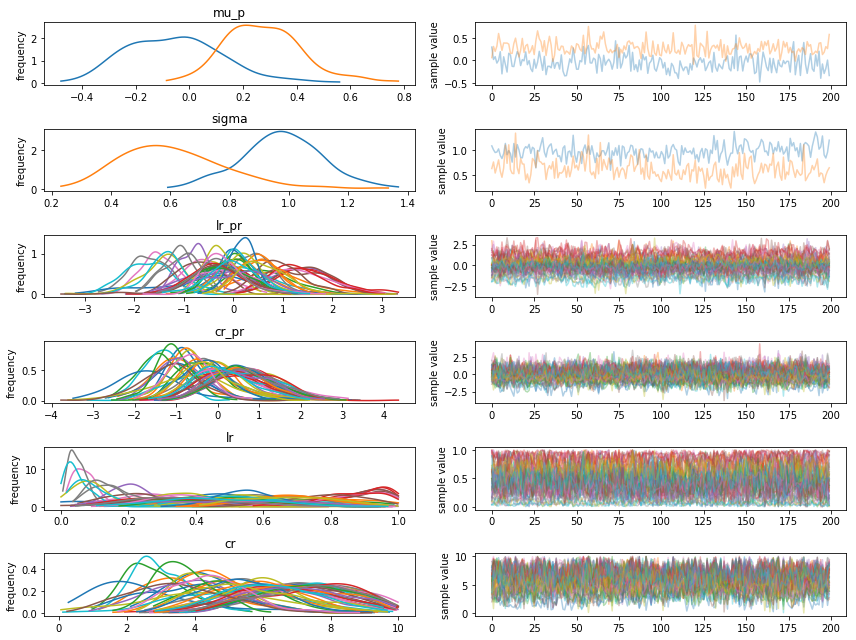

In [7]:
lrcr.trace_plot(figsize=(12, 9))